Github仓库地址：https://github.com/liuxinruiyay/vgs_mining
使用Video Game Sales数据集进行电子游戏销售分析，共有11个属性

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from sklearn.linear_model import LinearRegression
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
data = pd.read_csv('./data/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


剔除其中含有na的数据

In [4]:
print('原始数据行数',len(data))
data = data.dropna(how='any')
print('处理缺失值后的数据行数',len(data))


原始数据行数 16598
处理缺失值后的数据行数 16291


进行电子游戏销售情况市场分析，首先查看受欢迎游戏排行，根据rank属性进行排序


In [5]:
data_rank = data[['Rank', 'Name']].sort_values(by='Rank')
data_rank.head(10)


,Rank,Name
0,1,Wii Sports
1,2,Super Mario Bros.
2,3,Mario Kart Wii
3,4,Wii Sports Resort
4,5,Pokemon Red/Pokemon Blue
5,6,Tetris
6,7,New Super Mario Bros.
7,8,Wii Play
8,9,New Super Mario Bros. Wii
9,10,Duck Hunt


统计相同游戏类型全球销售额来找出受欢迎游戏类型，可以看出动作，运动和射击类项目比较受欢迎

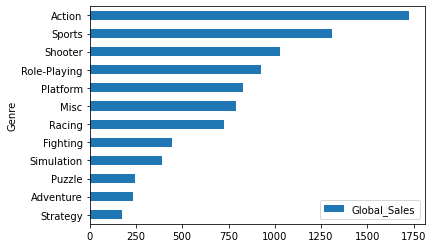

In [7]:
data_genre = data[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values(by='Global_Sales', ascending=True)
data_genre.plot.barh()

通过统计相同游戏发布平台的全球销售额来分析受欢迎游戏发布平台

Number of game platforms: 31


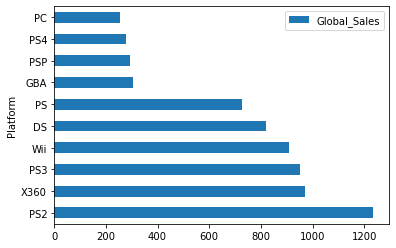

In [10]:
data_platform = data[['Platform', 'Global_Sales']].groupby('Platform').sum().sort_values(by='Global_Sales', ascending=False)
print("Number of game platforms:", len(data_platform))
data_platform.head(10).plot.barh()


通过统计相同游戏发行人的全球销售额度来分析受欢迎的游戏发行人

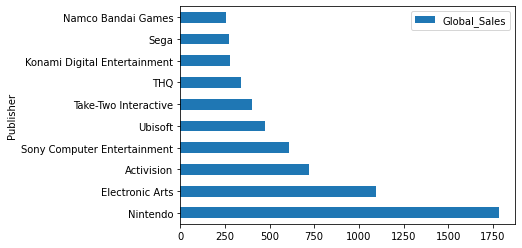

In [11]:
data_publisher = data[['Publisher', 'Global_Sales']].groupby('Publisher').sum().sort_values(by='Global_Sales', ascending=False)
data_publisher.head(10).plot.barh()

预测每一年电子游戏的销售额度

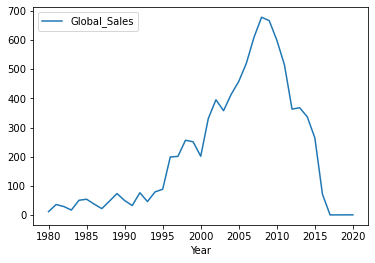

In [12]:
data_year = data[['Year', 'Global_Sales']].groupby('Year').sum().sort_values(by='Year')
data_year.plot()

In [13]:
data_year

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


剔除掉2016，2017以及2020年的异常数据

In [14]:
data_year = data_year.drop([2016,2017,2020]).reset_index()

建立线性回归模型预测每年电子游戏销售额

In [15]:
x = data_year['Year']
y = data_year['Global_Sales']
x = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

LinearRegression()

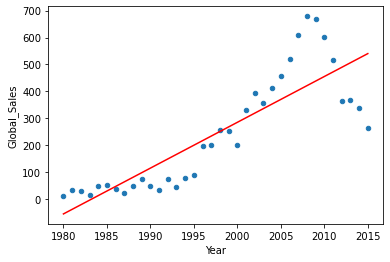

In [16]:
data_year.plot(kind="scatter", x='Year', y='Global_Sales')
plt.plot(x, model.predict(x), 'r-')
plt.show()

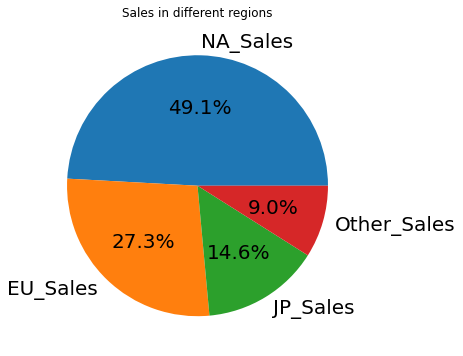

In [21]:
data_region=data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values(ascending=False)
data_region.plot.pie(autopct='%0.1f%%', title='Sales in different regions', figsize=(6, 6), fontsize=20)
plt.ylabel('')
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


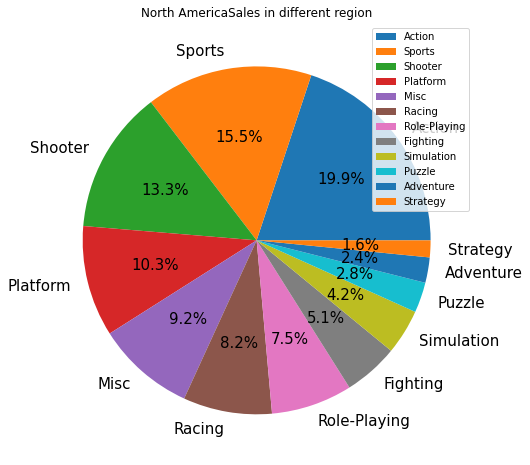

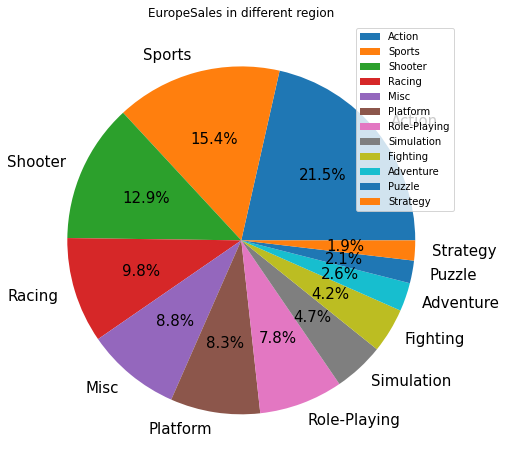

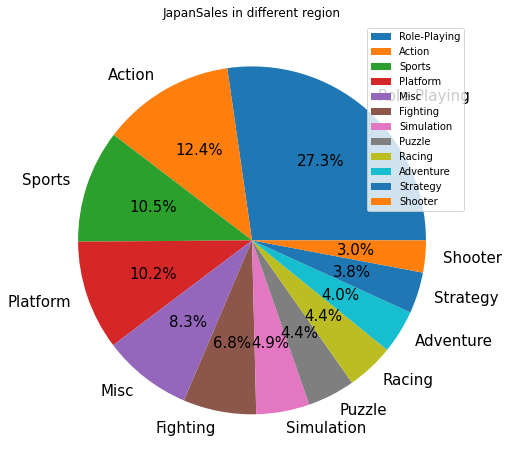

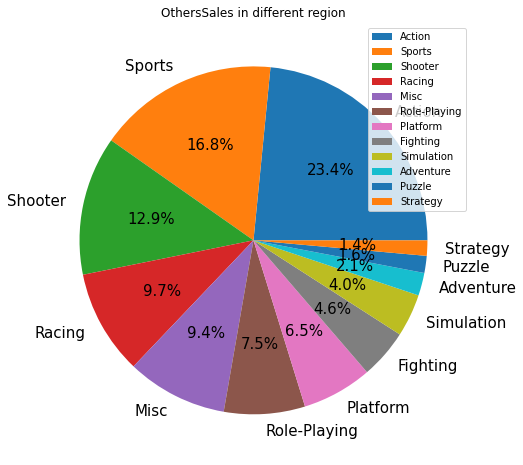

In [22]:
for region_name, region in [('North America', 'NA_Sales'), ('Europe', 'EU_Sales'), ('Japan', 'JP_Sales'), ('Others', 'Other_Sales')]:
    data_region = data[['Genre', region]].groupby('Genre').sum().sort_values(by=region, ascending=False)
    data_region.plot.pie(y=region, autopct='%0.1f%%', title=region_name+'Sales in different region', figsize=(8, 8), fontsize=15)
    plt.ylabel('')
    plt.show()